In [92]:
!pip install pandas

In [93]:
import pandas as pd

In [94]:
import pandas as pd

cols = ['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses', 'Class']

options = {'header': None, 'names': cols, 'skipinitialspace': True}

data = pd.read_csv('dataset/breast-cancer-wisconsin.data', **options)

In [95]:
data

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [96]:
data.isnull().sum()

Sample code number             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sample code number           699 non-null    int64 
 1   Clump Thickness              699 non-null    int64 
 2   Uniformity of Cell Size      699 non-null    int64 
 3   Uniformity of Cell Shape     699 non-null    int64 
 4   Marginal Adhesion            699 non-null    int64 
 5   Single Epithelial Cell Size  699 non-null    int64 
 6   Bare Nuclei                  699 non-null    object
 7   Bland Chromatin              699 non-null    int64 
 8   Normal Nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [98]:
import numpy as np
data['Bare Nuclei'] = data['Bare Nuclei'].replace('?', np.nan)

In [99]:
data['Bare Nuclei'] = pd.to_numeric(data['Bare Nuclei'], errors='coerce')

In [100]:
data.isnull().sum()

Sample code number              0
Clump Thickness                 0
Uniformity of Cell Size         0
Uniformity of Cell Shape        0
Marginal Adhesion               0
Single Epithelial Cell Size     0
Bare Nuclei                    16
Bland Chromatin                 0
Normal Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

In [101]:
column_mean = data['Bare Nuclei'].mean()
data['Bare Nuclei'].fillna(column_mean, inplace=True)

In [102]:
# 2 for benign
# 4 for malignant

In [103]:
data.isnull().sum()

Sample code number             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [104]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Sample code number           699 non-null    int64  
 1   Clump Thickness              699 non-null    int64  
 2   Uniformity of Cell Size      699 non-null    int64  
 3   Uniformity of Cell Shape     699 non-null    int64  
 4   Marginal Adhesion            699 non-null    int64  
 5   Single Epithelial Cell Size  699 non-null    int64  
 6   Bare Nuclei                  699 non-null    float64
 7   Bland Chromatin              699 non-null    int64  
 8   Normal Nucleoli              699 non-null    int64  
 9   Mitoses                      699 non-null    int64  
 10  Class                        699 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 60.2 KB


In [105]:
replacement_dict = {2: 0, 4: 1}
data['Class'] = data['Class'].replace(replacement_dict)

In [106]:
# 0 for benign
# 1 for malignant
#    Benign: 458 (65.5%)
#    Malignant: 241 (34.5%)

In [107]:
X = data.drop(['Sample code number', 'Class'], axis=1)
y = data['Class']

In [108]:
X.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,5,1,1,1,2,1.0,3,1,1
1,5,4,4,5,7,10.0,3,2,1
2,3,1,1,1,2,2.0,3,1,1
3,6,8,8,1,3,4.0,3,7,1
4,4,1,1,3,2,1.0,3,1,1


In [109]:
y[40:45]

40    0
41    1
42    1
43    1
44    1
Name: Class, dtype: int64

In [110]:
!pip install matplotlib

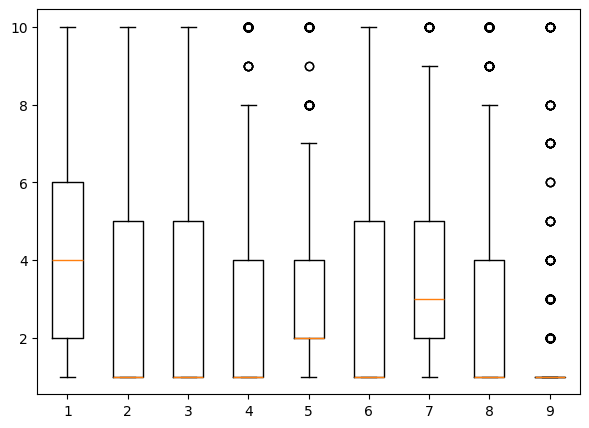

In [111]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize =(7, 5))
plt.boxplot(X.iloc[:,:10])
plt.show()

In [112]:
!pip install scikit-learn

In [113]:
X.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,5,1,1,1,2,1.0,3,1,1
1,5,4,4,5,7,10.0,3,2,1
2,3,1,1,1,2,2.0,3,1,1
3,6,8,8,1,3,4.0,3,7,1
4,4,1,1,3,2,1.0,3,1,1


In [114]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

names = X.columns

data = scaler.fit_transform(X)

X = pd.DataFrame(data, columns=names)

In [115]:
X.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,0.206936,-0.699995,-0.743299,-0.633247,-0.549561,-0.706991,-0.179662,-0.611825,-0.343912
1,0.206936,0.283845,0.266875,0.768621,1.710106,1.793513,-0.179662,-0.284112,-0.343912
2,-0.503866,-0.699995,-0.743299,-0.633247,-0.549561,-0.429158,-0.179662,-0.611825,-0.343912
3,0.562336,1.595632,1.613773,-0.633247,-0.097628,0.126510,-0.179662,1.354454,-0.343912
4,-0.148465,-0.699995,-0.743299,0.067687,-0.549561,-0.706991,-0.179662,-0.611825,-0.343912


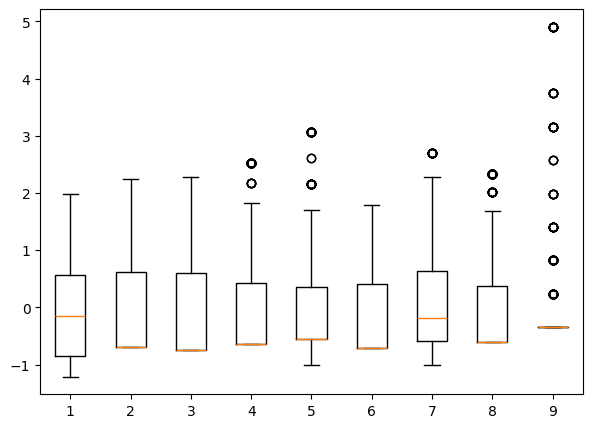

In [116]:
fig = plt.figure(figsize =(7, 5))
plt.boxplot(X.iloc[:,:10])
plt.show()

In [117]:
!pip install imbalanced-learn

In [118]:
X.shape

(699, 9)

In [119]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X, y = sm.fit_resample(X, y)

In [120]:
X.shape

(916, 9)

In [121]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)

In [122]:
pca.fit(X.T)

PCA(n_components=3)

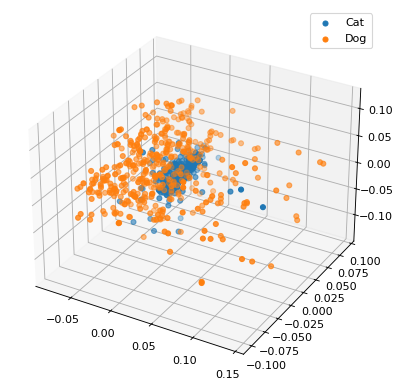

In [123]:
after_pca = pd.DataFrame(pca.components_.T)
after_pca['label'] = y

df1 = after_pca[after_pca['label']==0]
df2 = after_pca[after_pca['label']==1]

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8, 6), dpi=80)
ax = fig.add_subplot(projection='3d')
ax.scatter(df1[0],df1[1],df1[2])
ax.scatter(df2[0],df2[1],df2[2])
plt.legend(['Cat', 'Dog'])
plt.show()

In [124]:
from sklearn.model_selection import cross_val_score

In [136]:
# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
acc = cross_val_score(knn, X, y.ravel(), cv=5)
print("Accuracy KNN: %0.4f (+/- %0.4f)" % (acc.mean(), acc.std() * 2))

# Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
acc = cross_val_score(nb, X, y.ravel(), cv=5)
print("Accuracy NB: %0.4f (+/- %0.4f)" % (acc.mean(), acc.std() * 2))

# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
acc = cross_val_score(lr, X, y.ravel(), cv=5)
print("Accuracy LR: %0.4f (+/- %0.4f)" % (acc.mean(), acc.std() * 2))

# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
acc = cross_val_score(rf, X, y.ravel(), cv=5)
print("Accuracy RF: %0.4f (+/- %0.4f)" % (acc.mean(), acc.std() * 2))

# Support Vector Machine
from sklearn.svm import SVC
svm = SVC()
acc = cross_val_score(svm, X, y.ravel(), cv=5)
print("Accuracy SVM: %0.4f (+/- %0.4f)" % (acc.mean(), acc.std() * 2))

# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
acc = cross_val_score(gb, X, y.ravel(), cv=5)
print("Accuracy GB: %0.4f (+/- %0.4f)" % (acc.mean(), acc.std() * 2))

Accuracy KNN: 0.9782 (+/- 0.0365)
Accuracy NB: 0.9651 (+/- 0.0313)
Accuracy LR: 0.9727 (+/- 0.0331)
Accuracy RF: 0.9771 (+/- 0.0326)
Accuracy SVM: 0.9760 (+/- 0.0264)
Accuracy GB: 0.9760 (+/- 0.0460)


In [126]:
from sklearn.model_selection import GridSearchCV

In [127]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [128]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [129]:
param_grid_rf = {
     'max_depth': [10, 80, 90, 100, 110],
     'max_features': [2, 3],
     'n_estimators': [100, 200, 300]
}
param_grid_knn = {
    'n_neighbors':[i for i in range(1,15)]
}

In [130]:
gridSearchRF = GridSearchCV(estimator=rf, param_grid=param_grid_rf, scoring='accuracy', n_jobs=-1, cv=5)
gridSearchRF.fit(X, y)
print(gridSearchRF.best_params_)

{'max_depth': 80, 'max_features': 3, 'n_estimators': 300}


In [131]:
gridSearchRF.best_score_

0.9781836540746021

In [132]:
gridSearchRF.cv_results_['std_test_score'].mean()

0.01626875815768716

In [133]:
gridSearchKNN = GridSearchCV(estimator=knn, param_grid=param_grid_knn, scoring='accuracy', n_jobs=-1, cv=5)
gridSearchKNN.fit(X, y)
print(gridSearchKNN.best_params_)

{'n_neighbors': 1}


In [134]:
gridSearchKNN.best_score_

0.982543359467807

In [135]:
gridSearchKNN.cv_results_['std_test_score'].mean()

0.0180761676382304